In [2]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

You should consider upgrading via the 'C:\Users\user\.pyenv\pyenv-win\versions\3.10.1\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\.pyenv\pyenv-win\versions\3.10.1\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\.pyenv\pyenv-win\versions\3.10.1\python.exe -m pip install --upgrade pip' command.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 讀取與顯示數位影像

In [4]:
img_ori=cv2.imread(r"input\lena.bmp",-1)  #讀取影像檔案，第一個參數為檔案名稱，第二個參數為影像的讀取方式
cv2.imshow("example",img_ori)  #建立視窗，視窗名稱為example
cv2.waitKey(0)  #等待使用者的鍵盤輸入，單位為毫秒(ms)，例如1,000 代表等待1秒再關閉視窗，0則表示持續等待使用者輸入任意鍵後再關閉視窗。
cv2.destroyAllWindows()  #關閉所有視窗

## 1. Histogram Equalization
Histogram is the method to enhance image contrast.
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.

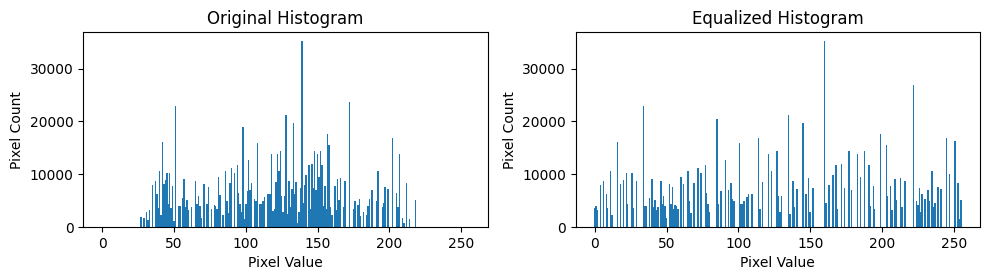

In [5]:
# 讀取灰階影像
img_ori = cv2.imread("input/lena.bmp", cv2.IMREAD_GRAYSCALE)

# 計算原始影像的直方圖
histogram_ori = cv2.calcHist([img_ori], [0], None, [256], [0, 256])

# 均衡化影像
img_equa = cv2.equalizeHist(img_ori)

# 計算均衡化後的直方圖
histogram_eqa = cv2.calcHist([img_equa], [0], None, [256], [0, 256])

# 儲存原始與均衡化影像
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', img_equa)

# 使用 matplotlib 顯示並儲存直方圖
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Histogram")
plt.bar(range(256),histogram_ori.flatten(),width=1)
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")

plt.subplot(2, 2, 2)
plt.title("Equalized Histogram")
plt.bar(range(256),histogram_eqa.flatten(),width=1)
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")

plt.tight_layout()
plt.savefig("output/histograms.png")
plt.show()

## 2.Mean blur, Gaussian blur, Median blur
Blur is a method to deal with the noise on the image. Please input the image and use different kernel size to show blur result.

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

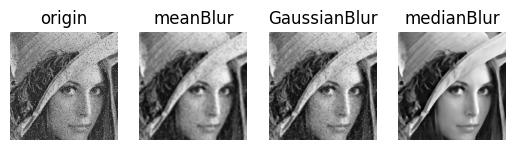

In [6]:
img_noise = cv2.imread("input\lena_noise.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,4,1)
plt.imshow(img_noise,cmap='gray')
plt.title("origin")
plt.axis("off")

# Blur the image by three methods.
image_meanBlur = cv2.blur(img_noise, (5,5))
image_GaussianBlur = cv2.GaussianBlur(img_noise, (5,5),0)
image_medianBlur = cv2.medianBlur(img_noise, 5)

#save result
cv2.imwrite('output/img_mean_blur.png', image_meanBlur)
cv2.imwrite('output/img_gaussian_blur.png', image_GaussianBlur)
cv2.imwrite('output/img_median_blur.png', image_medianBlur)

plt.subplot(1,4,2)
plt.imshow(image_meanBlur,cmap='gray')
plt.title("meanBlur")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(image_GaussianBlur,cmap='gray')
plt.title("GaussianBlur")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(image_medianBlur,cmap='gray')
plt.title("medianBlur")
plt.axis("off")

## 3. Binary
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  


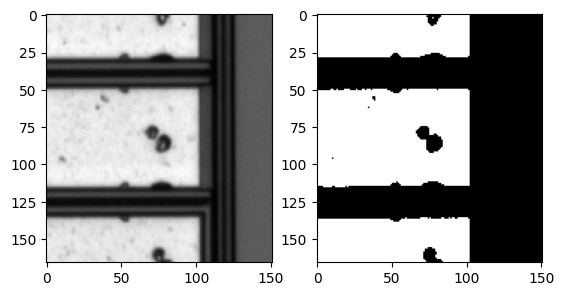

In [7]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

"""
Your code here
"""
_,thres1 = cv2.threshold(binary1,128,255,cv2.THRESH_BINARY)
# save result
cv2.imwrite('output/binary_task1.bmp', thres1)
plt.subplot(1,2,1)
plt.imshow(binary1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thres1,cmap='gray')

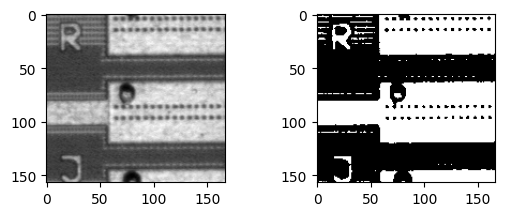

In [8]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

"""
Your code here
"""
_,thres2 = cv2.threshold(binary2,128,255,cv2.THRESH_BINARY)
# save result
cv2.imwrite('output/binary_task2.bmp', thres2)
plt.subplot(2,2,1)
plt.imshow(binary2,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(thres2,cmap='gray')

Text(0, 0.5, 'Pixel Count')

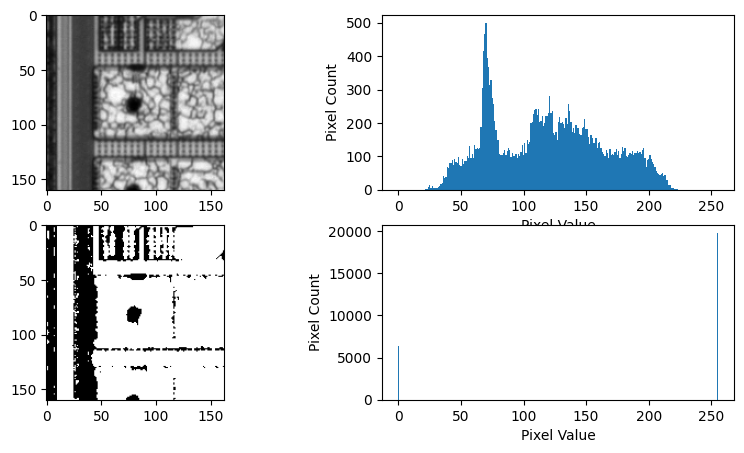

In [9]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

"""
Your code here
"""
_,thres3 = cv2.threshold(binary3,75,255,cv2.THRESH_BINARY)
histogram_ori = cv2.calcHist([binary3], [0], None, [256], [0, 256])
histogram_bi = cv2.calcHist([thres3], [0], None, [256], [0, 256])
# save result

cv2.imwrite('output/binary_task2.bmp', thres3)

plt.figure(figsize=(10, 5))

plt.subplot(2,2,1)
plt.imshow(binary3,cmap='gray')

plt.subplot(2,2,2)
plt.bar(range(256),histogram_ori.flatten(),width=1)
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")

plt.subplot(2,2,3)
plt.imshow(thres3,cmap='gray')

plt.subplot(2,2,4)
plt.bar(range(256),histogram_bi.flatten(),width=1)
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")

## 4. HSV filter
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

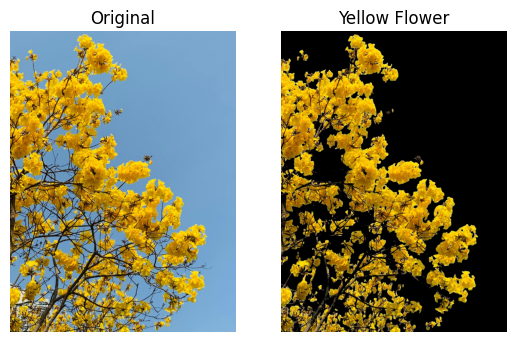

True

In [8]:
# 1. 讀取影像
img_bgr = cv2.imread('input/flower.jpg')

# 2. 轉為 HSV 空間
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# 3. 設定黃花 HSV 範圍並建立遮罩
lower_yellow = np.array([0, 43, 46])
upper_yellow = np.array([34, 255, 255])
mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# 4. 使用遮罩擷取黃色區域，其他區域為黑色
flower_yellow = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)

# 5. 顯示結果（需要將 BGR 轉為 RGB）
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
flower_yellow_rgb = cv2.cvtColor(flower_yellow, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(flower_yellow_rgb)
plt.axis("off")
plt.title("Yellow Flower")

plt.show()

# 6. 儲存結果
cv2.imwrite('output/flower_yellow.jpg', flower_yellow)

## 5. Morphological: erosion, dilation, open, close

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

Text(0.5, 1.0, 'eroded')

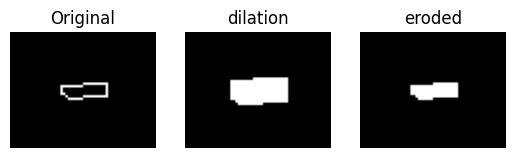

In [32]:
hsv_yellow = cv2.imread('input/cropHSV_yellow.jpg')

# Try to use erosion, dilation, open, close to fill up the lines.

threshold = cv2.inRange(hsv_yellow,(110,100,50),(180,255,255))

kernel = np.ones((5,5),np.uint8)
dilated_img =cv2.dilate(threshold,kernel,iterations=1)
eroded_img = cv2.erode(dilated_img,kernel,iterations=1)

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(threshold,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dilated_img,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("dilation")


plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(eroded_img,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("eroded")

Text(0.5, 1.0, 'eroded')

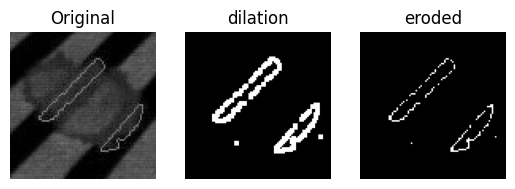

In [33]:
hsv_blue = cv2.imread('input/cropHSV_blue.jpg',cv2.IMREAD_GRAYSCALE)

# Try to use erosion, dilation, open, close to fill up the lines.

histogram_original = cv2.calcHist([hsv_blue], [0], None, [256], [0, 256])

_,threshold1 = cv2.threshold(hsv_blue,110,255,cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
dilated_img1 =cv2.dilate(threshold1,kernel,iterations=1)
eroded_img1 = cv2.erode(dilated_img1,kernel,iterations=1)

plt.subplot(1, 3, 1)
#plt.bar(range(256),histogram_ori.flatten(),width=1)
#plt.xlabel("Pixel Value")
#plt.ylabel("Pixel Count")
plt.imshow(cv2.cvtColor(hsv_blue,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dilated_img1,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("dilation")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(eroded_img1,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("eroded")

# save result
#cv2.imwrite('output/morpho_blue.jpg', result)

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

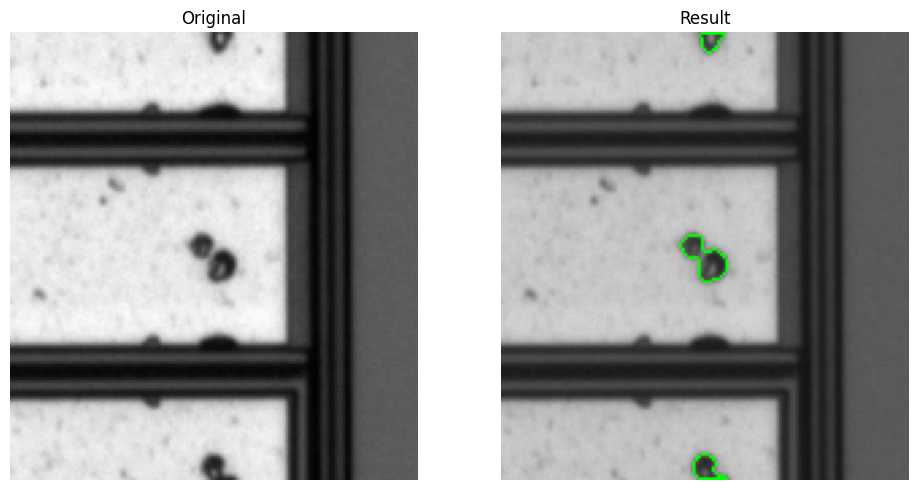

In [62]:
# 1. 讀圖（灰階）
img = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # 用來畫彩色框

# 2. Otsu 二值化
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 3. 找輪廓
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 4. 過濾掉太小/太大（避免雜訊與背景框）
filtered_contours = [c for c in contours if 5 < cv2.contourArea(c) < 500]

# 5. 畫綠色輪廓
cv2.drawContours(color_img, filtered_contours, -1, (0, 255, 0), 1)


# 7. 顯示圖像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(color_img)
plt.title("Result")
plt.axis("off")

plt.tight_layout()
plt.show()

